In [51]:
import sqlalchemy as sqa
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
db = 'postgres://localhost/poker'
engine = sqa.create_engine(db)

In [53]:
df = pd.read_sql('v6vv7_2019_08_20_13:28', con=engine)
df.shape

(142993, 26)

In [63]:
df[['player', 'bet']][df[['player']] == 2.0].head(100)

,player,bet
0,2.0,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,2.0,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [64]:
#df[['player', 'game', 'reward']].groupby(['game', 'player']).sum()

In [56]:
df['game'] = df.game.astype(int)

In [57]:
for i in range(df.shape[0]):
    if df.at[i, 'player'] == 0.0 or df.at[i, 'player'] == 2.0 or df.at[i, 'player'] == 4.0:
        df.at[i, 'agent'] = 'David'
    else:
        df.at[i ,'agent'] = 'Kristian'

In [58]:
#df[['player', 'game', 'reward', 'agent']].groupby(['player', 'game'], as_index=False).mean().groupby(['game']).mean()

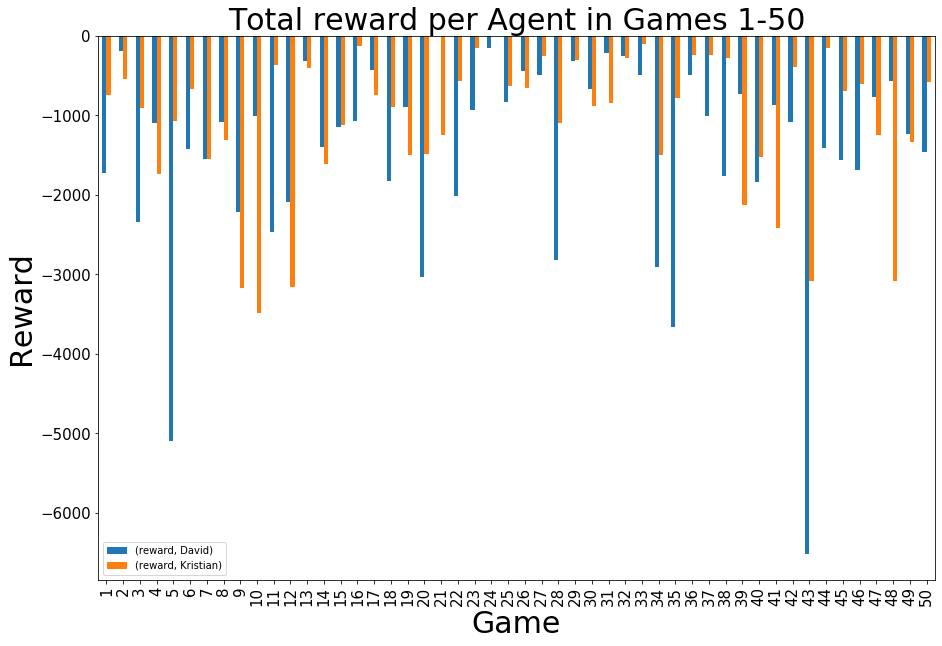

In [59]:
dfp = df[['player', 'game', 'reward', 'agent']].groupby(['player', 'game', 'agent'], as_index=False).mean()
dfp[['agent', 'game', 'reward']].groupby(['agent', 'game']).mean().unstack(0).iloc[:50,:].plot(kind='bar', figsize=(15, 10), fontsize=15)
#dfp.unstack(1).plot()
plt.xlabel('Game', fontsize=30)
plt.ylabel('Reward', fontsize=30)
plt.title('Total reward per Agent in Games 1-50', fontsize=30)
plt.legend()
plt.savefig('davidvkristian.png')

In [46]:
df1 = df[df['agent']=='David']
#df1
df3 = df1[['player', 'game', 'reward', 'agent']].groupby(['player', 'agent', 'game']).mean().sum()#.describe()
df3.head()

reward    300.409979
dtype: float64

In [47]:
df2 = df[df['agent']=='Kristian']
df4 = df2[['player', 'game', 'reward', 'agent']].groupby(['player', 'agent', 'game']).mean()#.sum()#.describe()
df4.head()

reward
player agent    game          
1.0    Kristian 1    -0.274074
                2    -0.159545
                3    -0.020000
                4    -0.177500
                5    -0.130000

In [48]:
df1.shape, df2.shape, df3.shape, df4.shape

((36477, 26), (36010, 26), (1,), (3000, 1))

In [49]:
stat = stats.ttest_1samp(np.array(df4['reward']), 0)

In [50]:
stat.pvalue

6.673661901314872e-14

By agent:

In [12]:
df[['agent', 'reward', 'player', 'game']].groupby(['agent', 'player', 'game'], as_index=False).mean()[['agent', 'reward']].groupby(['agent']).mean()

,reward
agent,
1,-748.388173
2,743.338849


By player:

In [13]:
df[['reward', 'player', 'game']].groupby(['player', 'game'], as_index=False).mean()[['player', 'reward']].groupby(['player']).mean()

,reward
player,
0.0,-759.101405
1.0,2714.393771
2.0,-723.221710
3.0,-231.657892
4.0,-762.841404
5.0,-252.719333
